In [43]:
# Cell 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# Cell 2: Load and preview the dataset
df = pd.read_csv("plant_spectro_image_processed.csv")
df.columns

Index(['Unnamed: 0', 'Records', 'class_s', '410', '435', '460', '485', '510',
       '535', '560', '585', '610', '645', '680', '705', '730', '760', '810',
       '860', '900', '940', 'image_name', 'folder', 'class'],
      dtype='object')

In [45]:
# Keep only the 18-band spectrometer columns and the label
spectro_cols = ['410', '435', '460', '485', '510',
       '535', '560', '585', '610', '645', '680', '705', '730', '760', '810',
       '860', '900', '940']  # Assuming band1, band2, ..., band18 naming
df = df[spectro_cols + ['class']]  # Replace 'label' with actual column name if different
df.head()

,410,435,460,485,510,535,560,585,610,645,680,705,730,760,810,860,900,940,class
0,417.32,512.69,857.61,480.97,510.68,610.51,323.84,411.76,679.50,338.28,701.74,653.83,1933.91,2201.59,2225.50,2375.30,1037.52,687.4,u
1,89.24,95.52,144.93,86.19,102.45,99.10,71.09,97.65,113.25,52.60,131.76,118.80,394.77,504.55,667.05,651.24,239.76,127.6,u
2,115.59,137.43,198.91,115.84,136.34,140.71,81.09,111.25,136.13,59.87,134.76,118.38,506.00,633.33,640.40,720.02,274.36,167.4,u
3,1070.08,1686.23,2807.71,768.26,1004.01,907.07,909.91,1505.08,1134.78,1469.85,1739.88,879.30,4066.77,4191.25,4162.17,4462.14,1876.06,1281.4,u
4,502.31,498.07,537.75,618.13,640.71,479.64,436.52,582.91,1205.70,545.69,469.16,387.78,1857.93,1266.67,2044.98,1930.41,486.32,382.1,u


In [46]:
# Cell 3: Encode labels (H=0, U=1)
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['class'])  # H->0, U->1
X = df[spectro_cols]
y = df['label_encoded']


In [47]:
# Cell 4: Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
# Cell 5: Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}


In [49]:
# Cell 6: Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


--- Logistic Regression ---
              precision    recall  f1-score   support

           h       0.40      0.22      0.29         9
           u       0.53      0.73      0.62        11

    accuracy                           0.50        20
   macro avg       0.47      0.47      0.45        20
weighted avg       0.47      0.50      0.47        20

--- Random Forest ---
              precision    recall  f1-score   support

           h       0.55      0.67      0.60         9
           u       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20

--- SVM (RBF) ---
              precision    recall  f1-score   support

           h       0.33      0.11      0.17         9
           u       0.53      0.82      0.64        11

    accuracy                           0.50        20
   macro avg       0.43      0.46      0.40        20
weight

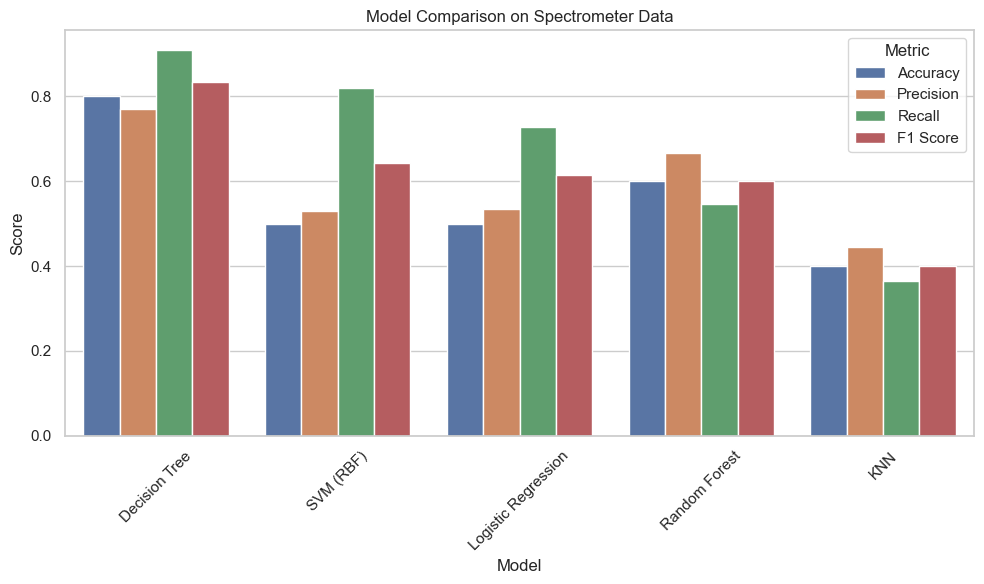

,Model,Accuracy,Precision,Recall,F1 Score
3,Decision Tree,0.8,0.769231,0.909091,0.833333
2,SVM (RBF),0.5,0.529412,0.818182,0.642857
0,Logistic Regression,0.5,0.533333,0.727273,0.615385
1,Random Forest,0.6,0.666667,0.545455,0.600000
4,KNN,0.4,0.444444,0.363636,0.400000


In [ ]:
# Cell 7: Compare results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison on Spectrometer Data")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()  

results_df


-- Decision Tree ---
              precision    recall  f1-score   support

           h       0.86      0.67      0.75         9
           u       0.77      0.91      0.83        11
          ma       0.81      0.79      0.79        20
          wa       0.81      0.80      0.80        20

    accuracy                           0.80        20


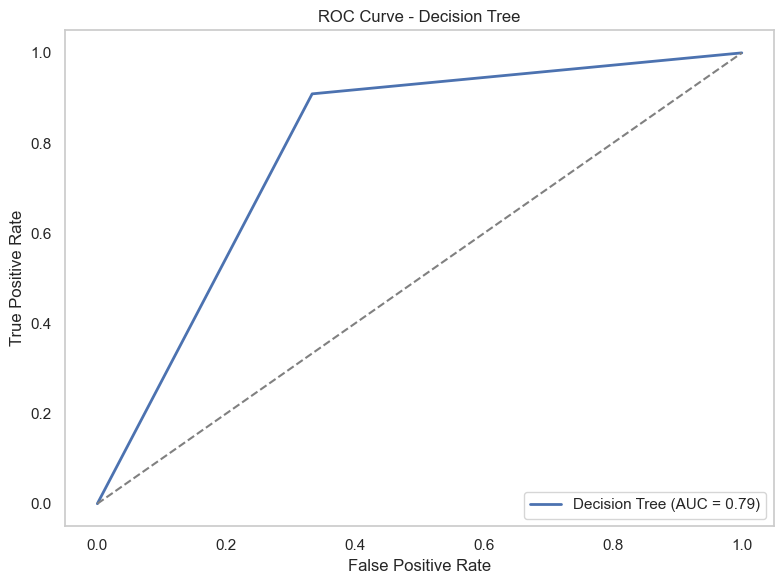

Saved Decision Tree ROC curve and predictions to 'decision_tree_predictions.csv'


In [53]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get the decision tree model
dt_model = models['Decision Tree']

# Get predicted labels and probabilities
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1 (U)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Save true vs predicted labels to CSV
preds_dt_df = pd.DataFrame({
    'True Label': label_encoder.inverse_transform(y_test),
    'Predicted Label': label_encoder.inverse_transform(y_pred_dt)
})
preds_dt_df.to_csv("decision_tree_predictions.csv", index=False)

print("Saved Decision Tree ROC curve and predictions to 'decision_tree_predictions.csv'")
